In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib.util
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    
import src.data_handle as dt
#file_path = os.path.join(project_root, 'src', 'data_handle', 'load_clean_first_look.py')
from src.data_handle.load_clean_first_look import FirstLook
from src.data_handle.eda import ForexEDA

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = FirstLook('../data/xauaud.csv')


Data loaded successfully!
Shape: (27621, 6)

DATASET SUMMARY
Total Rows: 27621
Total Columns: 6
Date Range: 2021-01-04 01:00:00 to 2025-09-05 20:00:00
Numeric Columns: ['open', 'high', 'low', 'close']
Non Numeric Columns: ['date', 'time']
Missing Values: 0
Duplicates: 0
Columns: Index(['date', 'time', 'open', 'high', 'low', 'close'], dtype='object')


In [3]:
df.display_info()

DATASET INFORMATION

1. BASIC INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27621 entries, 2021-01-04 01:00:00 to 2025-09-05 20:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    27621 non-null  object 
 1   time    27621 non-null  object 
 2   open    27621 non-null  float64
 3   high    27621 non-null  float64
 4   low     27621 non-null  float64
 5   close   27621 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB
None

2. FIRST 3 ROWS:
                           date      time     open     high      low    close
datetime                                                                     
2021-01-04 01:00:00  2021.01.04  01:00:00  2473.88  2483.05  2471.08  2480.66
2021-01-04 02:00:00  2021.01.04  02:00:00  2480.66  2489.25  2477.26  2489.05
2021-01-04 03:00:00  2021.01.04  03:00:00  2489.05  2491.15  2483.41  2483.41

3. LAST 3 ROWS:
                           date      time  

In [4]:
df.check_missing_values_and_duplicates()

MISSING VALUES ANALYSIS

1. NaN VALUES PER COLUMN:
date     0
time     0
open     0
high     0
low      0
close    0
dtype: int64

2. DUPLICATE ROWS: 0

3. MISSING VALUES PER COLUMN:
date     0
time     0
open     0
high     0
low      0
close    0
dtype: int64

4. TOTAL MISSING VALUES: 0

5. MISSING VALUES PERCENTAGE:
date     0.0
time     0.0
open     0.0
high     0.0
low      0.0
close    0.0
dtype: float64

6. INFINITE VALUES:
open     0
high     0
low      0
close    0
dtype: int64


<Figure size 1500x600 with 0 Axes>

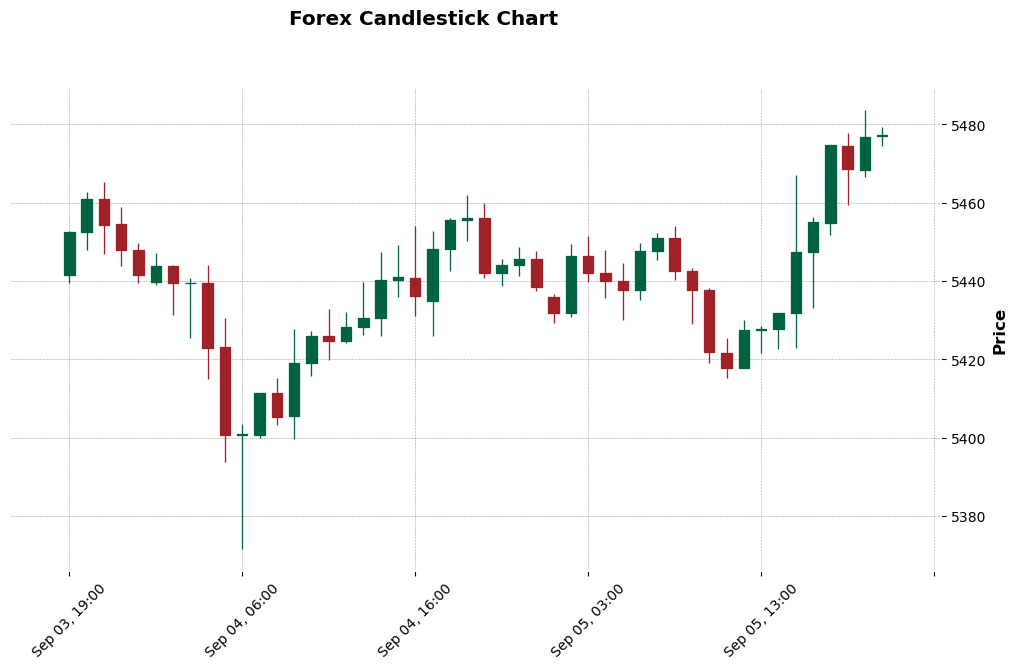

In [5]:
df.plot_candlestick(periods=48)

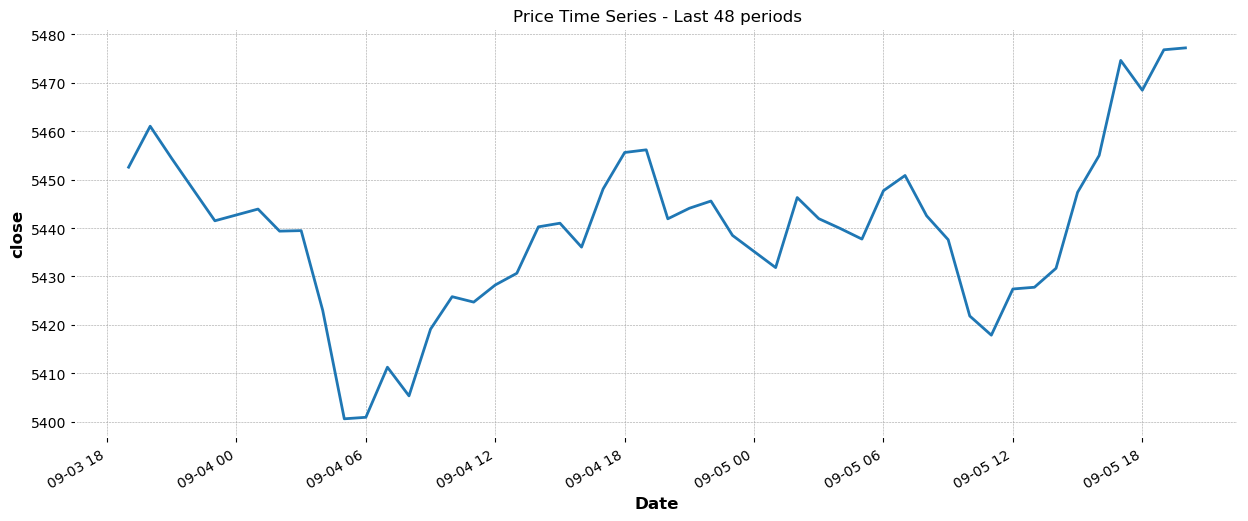

In [6]:
df.plot_time_series(periods=48)

In [7]:
df.get_summary()

DATASET SUMMARY
Total Rows: 27621
Total Columns: 6
Date Range: 2021-01-04 01:00:00 to 2025-09-05 20:00:00
Numeric Columns: ['open', 'high', 'low', 'close']
Non Numeric Columns: ['date', 'time']
Missing Values: 0
Duplicates: 0
Columns: Index(['date', 'time', 'open', 'high', 'low', 'close'], dtype='object')


In [8]:
eda = ForexEDA(file_path='../data/xauaud.csv')

Data loaded successfully!
Shape: (27621, 6)

DATASET SUMMARY
Total Rows: 27621
Total Columns: 6
Date Range: 2021-01-04 01:00:00 to 2025-09-05 20:00:00
Numeric Columns: ['open', 'high', 'low', 'close']
Non Numeric Columns: ['date', 'time']
Missing Values: 0
Duplicates: 0
Columns: Index(['date', 'time', 'open', 'high', 'low', 'close'], dtype='object')
DATASET SUMMARY
Total Rows: 27621
Total Columns: 6
Date Range: 2021-01-04 01:00:00 to 2025-09-05 20:00:00
Numeric Columns: ['open', 'high', 'low', 'close']
Non Numeric Columns: ['date', 'time']
Missing Values: 0
Duplicates: 0
Columns: Index(['date', 'time', 'open', 'high', 'low', 'close'], dtype='object')


COMPREHENSIVE EXPLORATORY DATA ANALYSIS
BASIC DATA ANALYSIS
Dataset shape: (27621, 6)
Date range: 2021-01-04 01:00:00 to 2025-09-05 20:00:00
Total periods: 27621
Available OHLC columns: ['open', 'high', 'low', 'close']

Data types:
date      object
time      object
open     float64
high     float64
low      float64
close    float64
dtype: object

Missing values:
date     0
time     0
open     0
high     0
low      0
close    0
dtype: int64

PRICE TREND ANALYSIS (CLOSE)
Mean price: 3180.7492
Median price: 2900.0100
Standard deviation: 866.0451
Minimum price: 2190.9600
Maximum price: 5477.2300

Average daily return: 0.0030%
Return volatility: 0.1844%
Maximum daily gain: 2.0100%
Maximum daily loss: -3.9583%
Error in plotting price trend analysis: local variable 'current_trend' referenced before assignment

Current trend (20 vs 50 MA): Uptrend
Bullish crossovers (20MA > 50MA): 322
Bearish crossovers (20MA < 50MA): 322
Most recent crossover: None

STATIONARITY TESTS (CLOSE)
Augmented Dickey

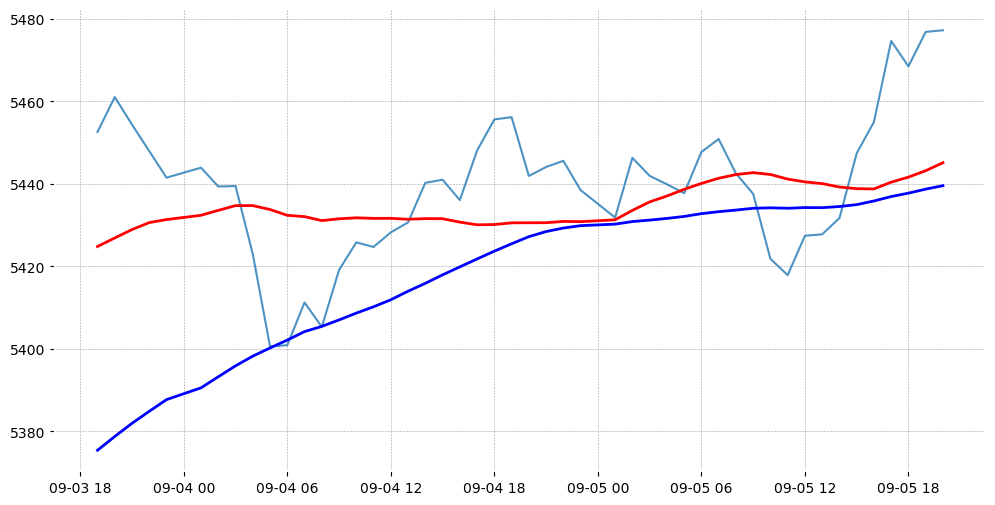

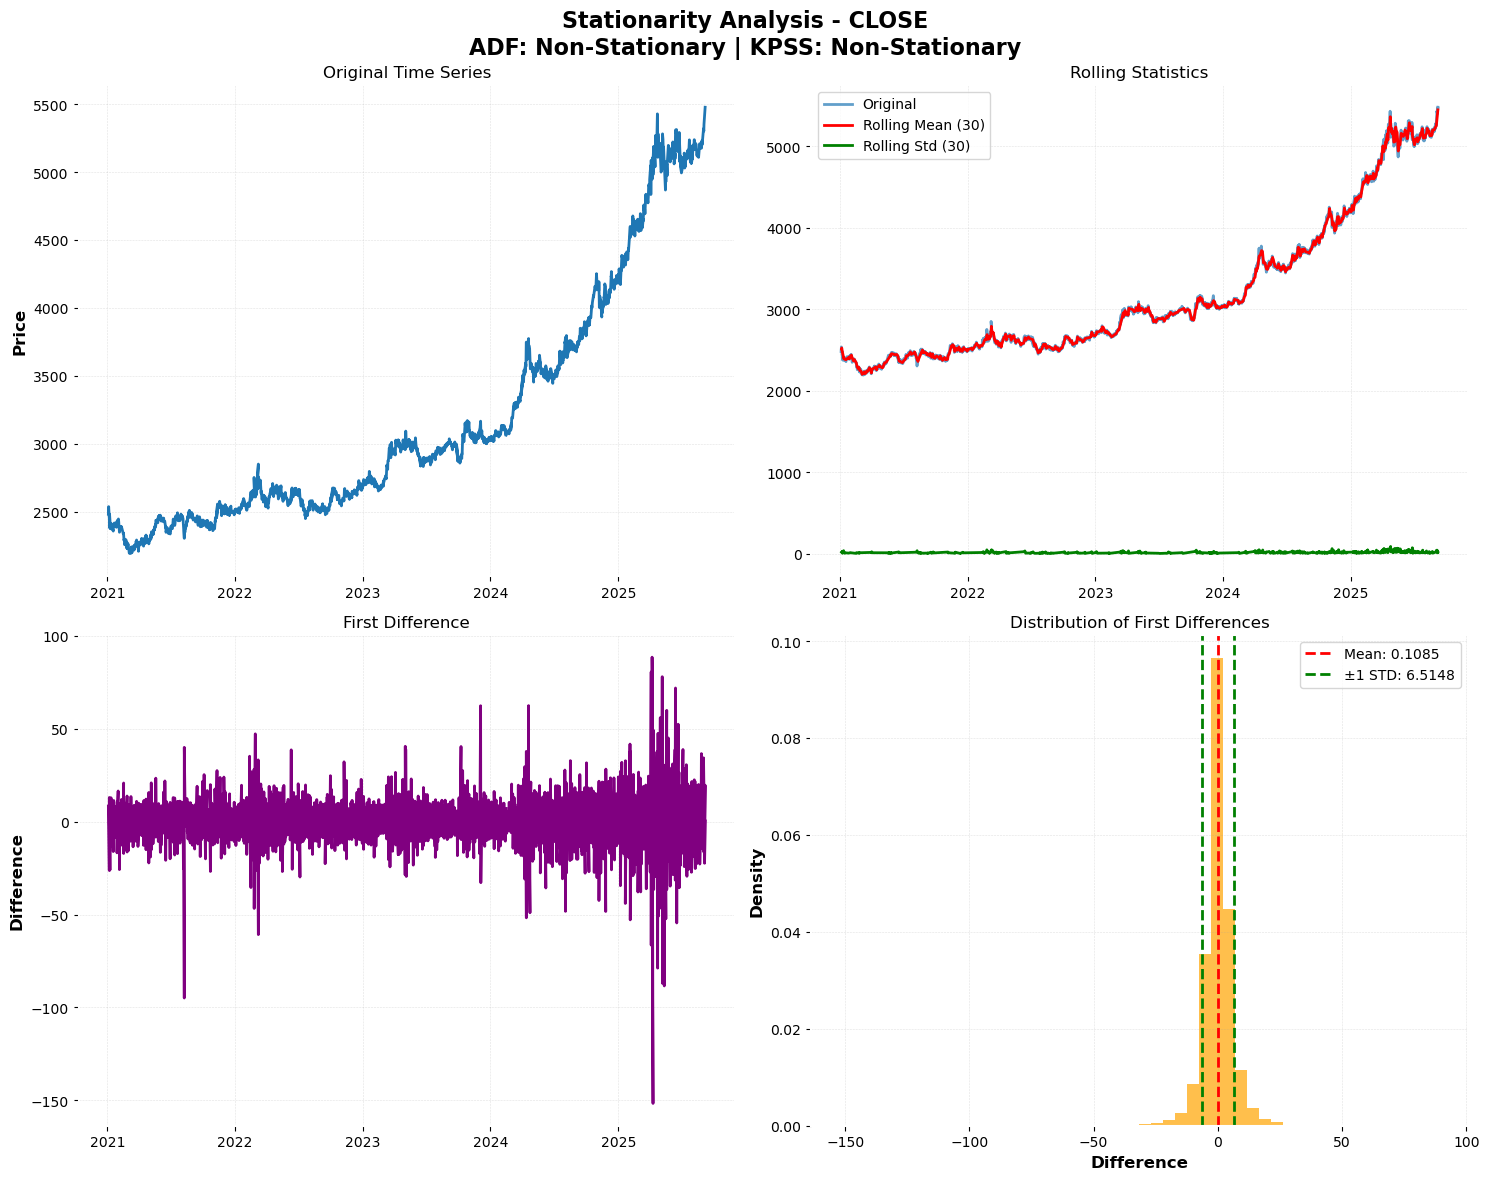


DISTRIBUTION ANALYSIS (CLOSE)


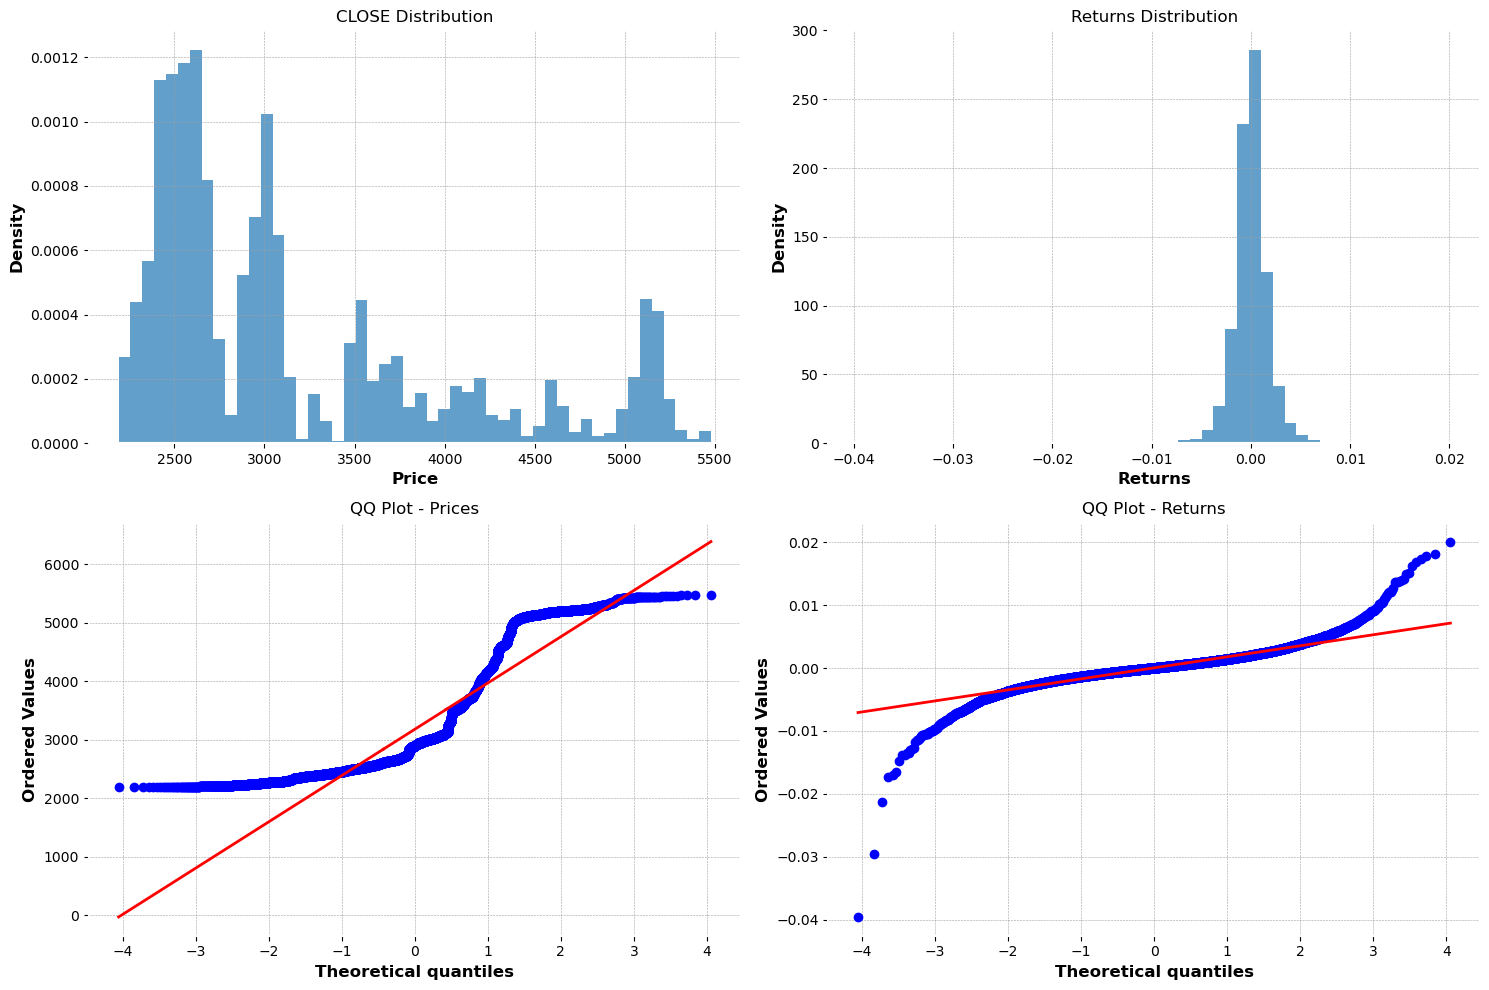

Normality Tests for Returns:
D'Agostino's K^2 Test: statistic=7491.1624, p-value=0.0000
Shapiro-Wilk Test: statistic=0.9041, p-value=0.0000

VOLATILITY ANALYSIS (CLOSE)


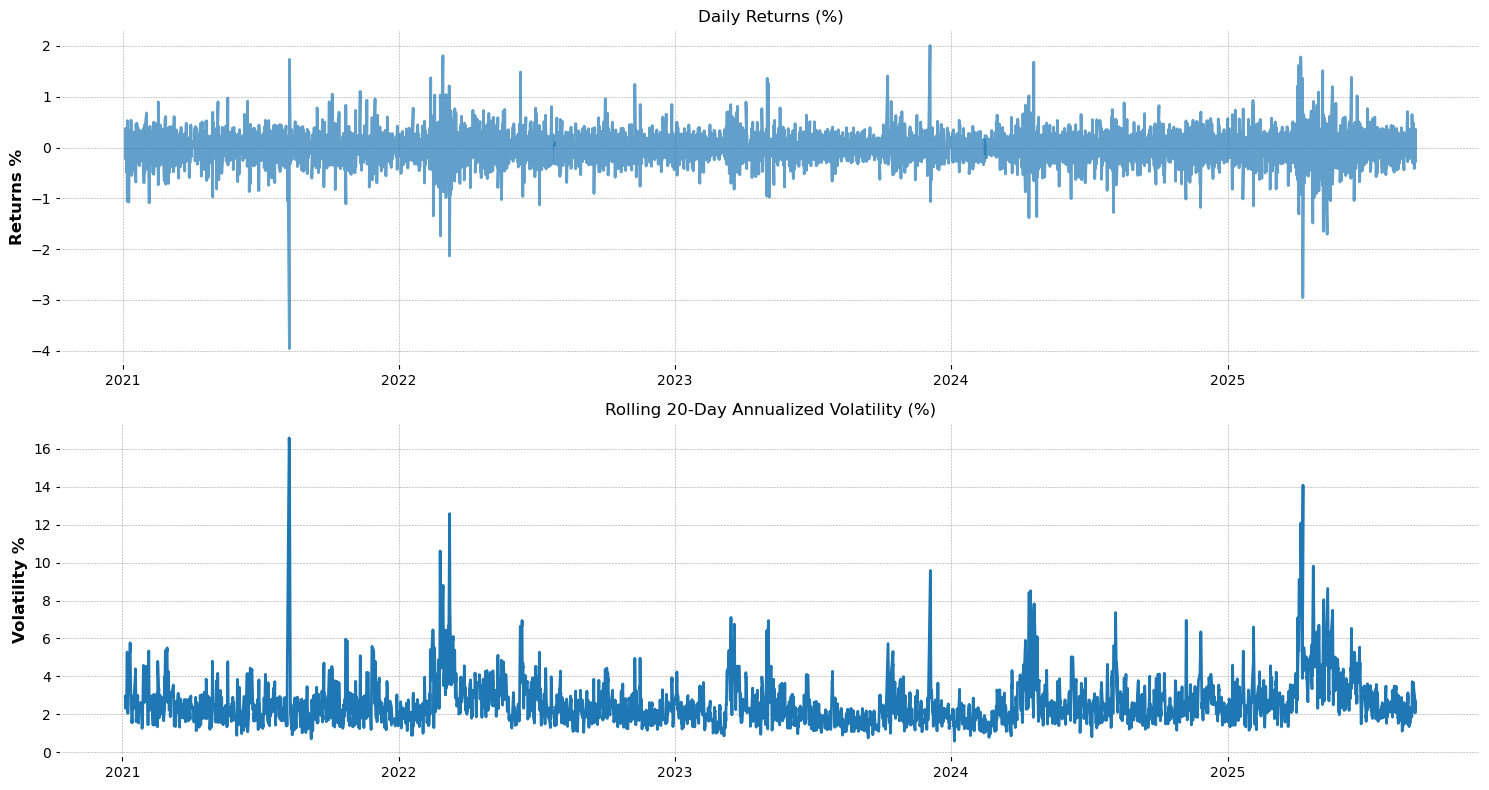

Average volatility: 2.66%
Maximum volatility: 16.57%
Minimum volatility: 0.59%

CORRELATION ANALYSIS


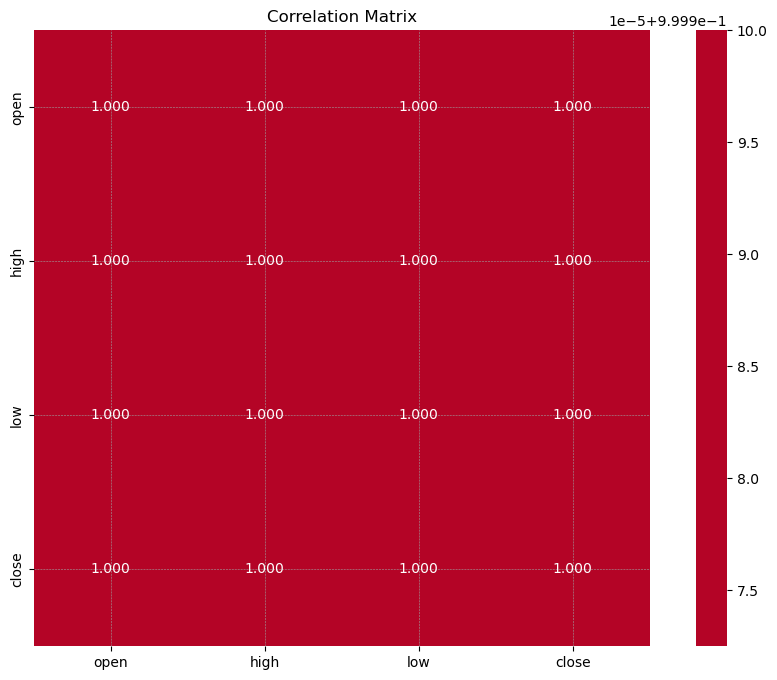

Strongest correlations:
open - high: 1.000
open - low: 1.000
open - close: 1.000
high - low: 1.000
high - close: 1.000
low - close: 1.000

AUTOCORRELATION ANALYSIS (CLOSE)


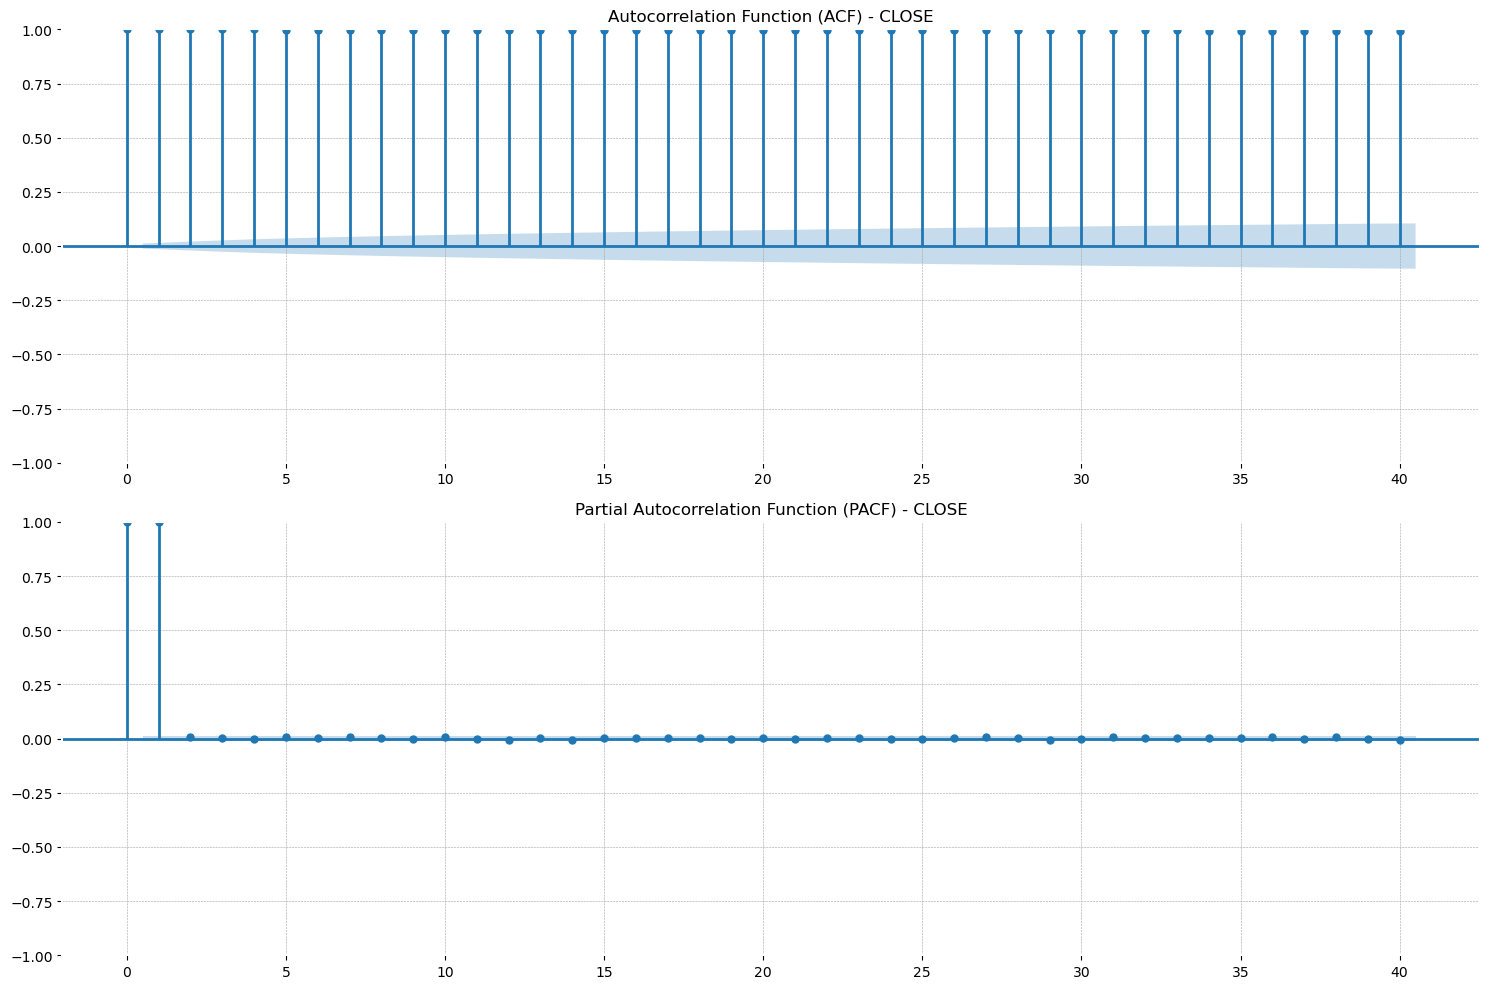


 EDA analysis completed!


In [9]:
eda.comprehensive_eda(plot=True)

In [14]:
eda.comprehensive_eda(plot=False)

COMPREHENSIVE EXPLORATORY DATA ANALYSIS
BASIC DATA ANALYSIS
Dataset shape: (27621, 6)
Date range: 2021-01-04 01:00:00 to 2025-09-05 20:00:00
Total periods: 27621
Available OHLC columns: ['open', 'high', 'low', 'close']

Data types:
date      object
time      object
open     float64
high     float64
low      float64
close    float64
dtype: object

Missing values:
date     0
time     0
open     0
high     0
low      0
close    0
dtype: int64

PRICE TREND ANALYSIS (CLOSE)
Mean price: 3180.7492
Median price: 2900.0100
Standard deviation: 866.0451
Minimum price: 2190.9600
Maximum price: 5477.2300

Average daily return: 0.0030%
Return volatility: 0.1844%
Maximum daily gain: 2.0100%
Maximum daily loss: -3.9583%

Current trend (20 vs 50 MA): Uptrend
Bullish crossovers (20MA > 50MA): 322
Bearish crossovers (20MA < 50MA): 322
Most recent crossover: None

STATIONARITY TESTS (CLOSE)
Augmented Dickey-Fuller Test:
ADF Statistic: 2.3305
p-value: 0.9990

KPSS Test:
KPSS Statistic: 23.5839
p-value: 0.0

In [15]:
eda.check_missing_values_and_duplicates()

MISSING VALUES ANALYSIS

1. NaN VALUES PER COLUMN:
date     0
time     0
open     0
high     0
low      0
close    0
dtype: int64

2. DUPLICATE ROWS: 0

3. MISSING VALUES PER COLUMN:
date     0
time     0
open     0
high     0
low      0
close    0
dtype: int64

4. TOTAL MISSING VALUES: 0

5. MISSING VALUES PERCENTAGE:
date     0.0
time     0.0
open     0.0
high     0.0
low      0.0
close    0.0
dtype: float64

6. INFINITE VALUES:
open     0
high     0
low      0
close    0
dtype: int64
